## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
### Attributes

<b>People</b>

ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise <br> 

<b>Products</b>

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>

<b>Promotion</b>

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

<b>Place</b>

NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

#### Target
Need to perform clustering to summarize customer segments.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [191]:
df = pd.read_csv("marketing_campaign.csv", header=0, sep='\t')

In [192]:
df.head(11).style.highlight_null(null_color='yellow')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [194]:
df['ID'].nunique()

2240

In [195]:
# ID column is of no use so we drop it
df = df.drop('ID', axis=1)

In [196]:
df.info() #Information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


## Handling Missing Values

In [198]:
null_col = df.isnull().sum()
null_col = null_col[null_col>0]
print(f'Column: {null_col.index[0]} having {null_col.values[0]} missing values')

Column: Income having 24 missing values


In [199]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [200]:
df['Income'].isnull().sum()

0

## Outlier detection

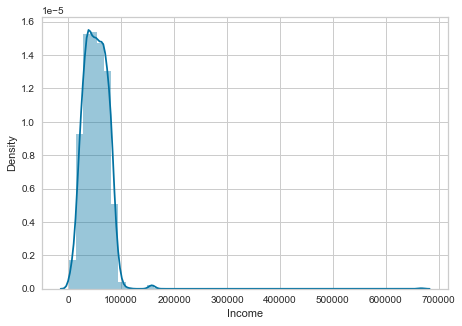

In [201]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Income'])
plt.show()

<AxesSubplot:xlabel='Income'>

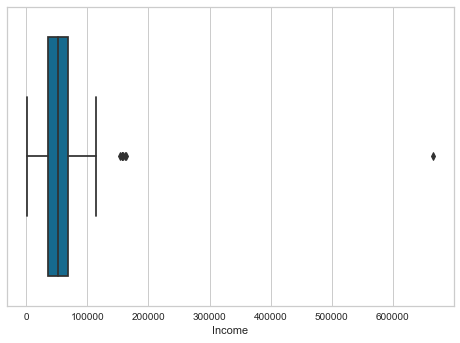

In [202]:
sns.boxplot(df['Income'])

In [203]:
income_sort = np.sort(df['Income'])
income_sort

array([  1730.,   2447.,   3502., ..., 160803., 162397., 666666.])

In [204]:
Q1 = np.percentile(income_sort, 25, interpolation='nearest') 
Q2 = np.percentile(income_sort, 50, interpolation='nearest') 
Q3 = np.percentile(income_sort, 75, interpolation='nearest')

print('Q1 25 percentile of the given data is:', Q1)
print('Q1 50 percentile of the given data is:', Q2)
print('Q1 75 percentile of the given data is:', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is: 35544.0
Q1 50 percentile of the given data is: 51766.0
Q1 75 percentile of the given data is: 68281.0
Interquartile range is 32737.0


In [205]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is:', low_lim)
print('up_limit is:', up_lim)

low_limit is: -13561.5
up_limit is: 117386.5


In [206]:
outlier=[]
for x in income_sort:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print(f'Outliers in Income are {outlier}')
print(f'Number of Outliers in Income are: {len(outlier)}')

Outliers in Income are [153924.0, 156924.0, 157146.0, 157243.0, 157733.0, 160803.0, 162397.0, 666666.0]
Number of Outliers in Income are: 8


## Feature Engineering


In [216]:
# Calculated present age of the customer from the birth year column
df['Age'] = int(pd.datetime.now().year) - df['Year_Birth']

In [218]:
df_Edu = pd.DataFrame(df['Education'].value_counts()).reset_index()
df_Edu.columns = ['Education', 'Count']

In [219]:
df_Edu

,Education,Count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


In [227]:
fig = px.bar(df_Edu, x='Education', y='Count', color='Education')
fig.update_layout(width=600, height=300, title='Education ')
fig.show()

In [239]:
df_mar = pd.DataFrame(df['Marital_Status'].value_counts()).reset_index()
df_mar.columns = ['Marital Status','Count']

In [240]:
df_mar

,Marital Status,Count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [245]:
fig = px.bar(df_mar, x='Marital Status', y='Count', color='Marital Status')
fig.update_layout(width=600, height=350, title='Marital Status')
fig.show()